<a href="https://colab.research.google.com/github/mdkamrulhasan/data_mining_kdd/blob/main/notebooks/Exploratory_data_Analysis_Retail_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## 1. Indexing
## 2. Datetime
## 3. Data Processing: aggregation
## 4. Data visualizations: plotly

# Importing libraries

In [55]:
# accessing google drive
from google.colab import drive
# data processing
import pandas as pd
import numpy as np
# visualization
import plotly.express as px
import plotly.graph_objects as go



---



#About the Data

[Data (Retail) source](https://www.kaggle.com/datasets/manjeetsingh/retaildataset)


About Dataset
Context: One challenge of modeling retail data is the need to make decisions based on limited history. Holidays and some major events come once a year, and so does the chance to see how strategic decisions impacted the bottom line. In addition, markdowns are known to affect sales.

Content: You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments. The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays:Super Bowl, Labor Day, Thanksgiving, and Christmas.

Data is available in three .csv files: Stores, Features and Sales


Note: See, we have made some changes in the file names

In [56]:
stores = pd.read_csv("https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/main/data/retail/stores-data-set.csv")
features = pd.read_csv("https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/main/data/retail/Features-data-set.csv")
sales = pd.read_csv("https://raw.githubusercontent.com/mdkamrulhasan/data_mining_kdd/main/data/retail/sales-data-set.csv")

### Example retail (distribution) network; not directly related to the dataset above

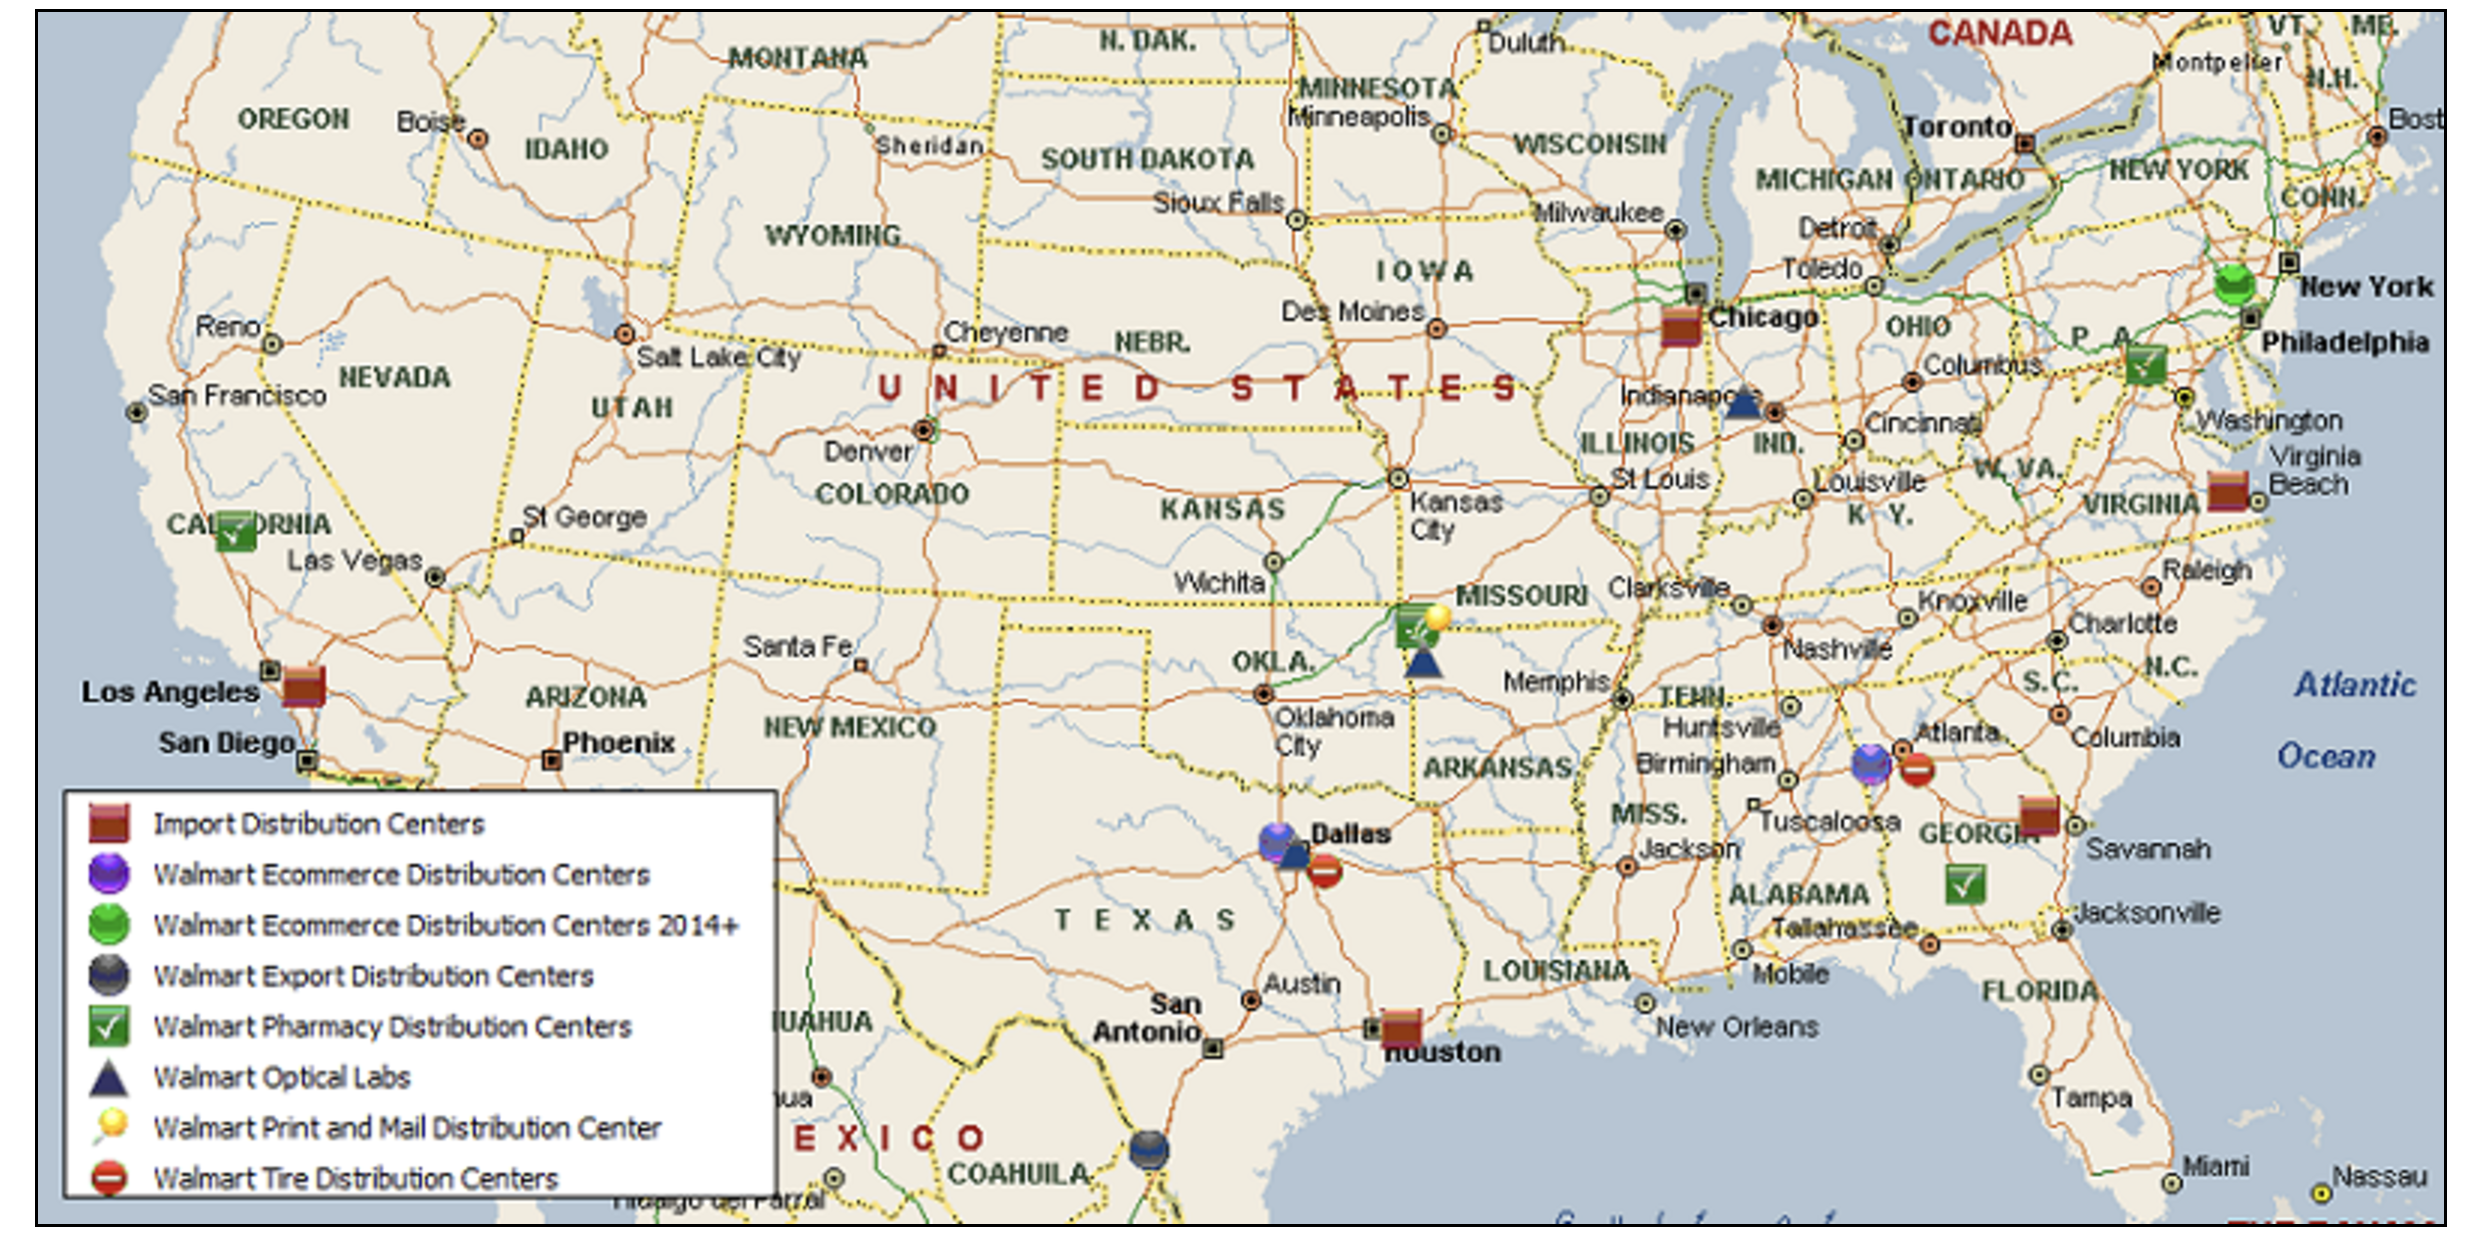

Our data today mainly talks about

### Lets have a first look of the data in each table?

In [57]:
stores.head(3)

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392

In [62]:
features.head(3)

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05/02/2010        42.31       2.572        NaN        NaN   
1      1  12/02/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False

In [63]:
sales.head(3)

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False

In [64]:
stores.Type.unique()

array(['A', 'B', 'C'], dtype=object)

### Mostly we will be talking about the sales data today

In [66]:
sales.shape

(421570, 5)

In [67]:
sales.index

RangeIndex(start=0, stop=421570, step=1)

In [68]:
sales.head(2)

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True

In [70]:
sales.loc[0]

Store                    1
Dept                     1
Date            05/02/2010
Weekly_Sales       24924.5
IsHoliday            False
Name: 0, dtype: object

In [72]:
sales.iloc[0]

Store                    1
Dept                     1
Date            05/02/2010
Weekly_Sales       24924.5
IsHoliday            False
Name: 0, dtype: object

In [73]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


### We want to find the max and min date available

In [74]:
sales.Weekly_Sales.min(), sales.Weekly_Sales.max()

(-4988.94, 693099.36)

In [76]:
sales.Date.min(), sales.Date.max()

('01/04/2011', '31/12/2010')

### Q: Can you guess the issue/problem here ?

In [77]:
sales.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

### Converting to date time format

In [78]:
sales['Date'] = pd.to_datetime(sales.Date, format="%d/%m/%Y")

In [79]:
sales.Date.min(), sales.Date.max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

In [80]:
sales.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

### Lets create some additional time related columns

In [81]:
sales['Year'] = sales.Date.dt.year
sales['Month'] = sales.Date.dt.month
sales['Week'] = sales.Date.dt.isocalendar().week

In [82]:
sales.head()

Store  Dept       Date  Weekly_Sales  IsHoliday  Year  Month  Week
0      1     1 2010-02-05      24924.50      False  2010      2     5
1      1     1 2010-02-12      46039.49       True  2010      2     6
2      1     1 2010-02-19      41595.55      False  2010      2     7
3      1     1 2010-02-26      19403.54      False  2010      2     8
4      1     1 2010-03-05      21827.90      False  2010      3     9

### Number of unique stores

In [117]:
sales.Store.nunique()

45

### Q. Find the sales per year (historical).

In [84]:
yearly_agg = sales.groupby(['Year']).agg({'Weekly_Sales': 'sum'})
yearly_agg.head()

Weekly_Sales
Year              
2010  2.288886e+09
2011  2.448200e+09
2012  2.000133e+09

## Lets comeback to the indexing idea we had at he beginning

In [85]:
sales.index.values[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### What are the indices of table yearly_agg ?

In [87]:
yearly_agg.index.values

array([2010, 2011, 2012], dtype=int32)

In [120]:
# this is expected to fail as the indexing (value) for "loc" has changed
yearly_agg.loc[0]

KeyError: 0

### Q. how do we fix it?

In [91]:
# iloc will work as it is referring to the index of an index
yearly_agg.iloc[0]

Weekly_Sales    2.288886e+09
Name: 2010, dtype: float64

# Lets study the sales pattern of a specific store

In [92]:
query_stroe_id = 1
store_x = sales[sales.Store == query_stroe_id]

In [93]:
store_x.Dept.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87, 90,
       91, 92, 93, 94, 95, 96, 97, 98, 99])

In [95]:
store_x.Dept.nunique()

77

In [96]:
fig = px.bar(store_x, x='Date', y='Weekly_Sales')
fig.show()
# this will show sales for all departments for our selected store

## Lets see how it looks for a specific department

In [97]:
query_dept_id = 1
store_dept_x = store_x[store_x.Dept == query_dept_id]

In [98]:
fig = px.bar(store_dept_x, x='Date', y='Weekly_Sales')
fig.show()

### Q. Whats the yearly sales of the selected (store, department)?

In [99]:
yearly_agg = store_dept_x.groupby(['Year']).agg({'Weekly_Sales': 'sum'})
yearly_agg.head()

Weekly_Sales
Year              
2010    1126348.73
2011    1171550.80
2012     921505.65

## Lets plot these values

In [100]:
fig = px.bar(yearly_agg, x=yearly_agg.index.values, y='Weekly_Sales')
fig.show()

### At first sight we may think, the store did the best on 2011; Is it right?

## Lets run the following cell.

In [102]:
store_dept_x.Date.min(), store_dept_x.Date.max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-10-26 00:00:00'))

Yes, we see year 2010, and 2012 are partial; lets plot the average sales.

## Whats the weekly average sales of this store?

In [108]:
weekly_agg = store_dept_x.groupby(['Week']).agg({'Weekly_Sales': 'mean'})
weekly_agg.head(3)

Weekly_Sales
Week              
1        16275.965
2        17127.050
3        17853.285

In [109]:
fig = px.bar(weekly_agg, x=weekly_agg.index.values, y='Weekly_Sales')
fig.show()

## Whats the monthly average sales of this store?

In [105]:
monthly_agg = store_dept_x.groupby(['Month']).agg({'Weekly_Sales': 'mean'})
monthly_agg.head(3)

Weekly_Sales
Month              
1      17418.992500
2      32700.750833
3      22210.847692


# $\color{red}{\text{This (and so does the next graph) is not right; Can you find the twist (Homework of this week)?}}$

In [107]:
fig = px.bar(monthly_agg, x=monthly_agg.index.values, y='Weekly_Sales')
fig.show()

# Rolling average (an example window function)

In [110]:
weekly_agg['sales_roll3'] = weekly_agg['Weekly_Sales'].rolling(3).mean()
weekly_agg['sales_roll5'] = weekly_agg['Weekly_Sales'].rolling(5).mean()
weekly_agg['sales_roll20'] = weekly_agg['Weekly_Sales'].rolling(20).mean()

In [111]:
weekly_agg.head(6)

Weekly_Sales   sales_roll3   sales_roll5  sales_roll20
Week                                                        
1     16275.965000           NaN           NaN           NaN
2     17127.050000           NaN           NaN           NaN
3     17853.285000  17085.433333           NaN           NaN
4     18419.670000  17800.001667           NaN           NaN
5     23366.916667  19879.957222  18608.577333           NaN
6     40305.050000  27363.878889  23414.394333           NaN

In [112]:
weekly_agg.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52],
      dtype='UInt32', name='Week')

Reseting index

In [113]:
weekly_agg = weekly_agg.reset_index()

In [114]:
weekly_agg.index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51])

## Q. Can you guess the difference between the two indices above?

In [115]:
weekly_agg.head(6)

Week  Weekly_Sales   sales_roll3   sales_roll5  sales_roll20
0     1  16275.965000           NaN           NaN           NaN
1     2  17127.050000           NaN           NaN           NaN
2     3  17853.285000  17085.433333           NaN           NaN
3     4  18419.670000  17800.001667           NaN           NaN
4     5  23366.916667  19879.957222  18608.577333           NaN
5     6  40305.050000  27363.878889  23414.394333           NaN

# Plotting multiple graps using the plotly grap object

In [116]:
fig = go.Figure([
    go.Scatter(x=weekly_agg['Week'],
               y=weekly_agg['Weekly_Sales']),
    go.Scatter(x=weekly_agg['Week'],
               y=weekly_agg['sales_roll3']),
        go.Scatter(x=weekly_agg['Week'],
               y=weekly_agg['sales_roll5']),
            go.Scatter(x=weekly_agg['Week'],
               y=weekly_agg['sales_roll20'])
]
               )

fig.update_layout(
    title="rolling averages of weekly sales",
    yaxis_title="weekly sales average", legend_title="rooling avg index ")

fig.update_layout(
    legend=dict(
        x=0.05,
        y=0.95,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=12,
            color="black"
        ),
    )
)
fig.show()

### Sample Tasks/Challenges:

* Predict the department-wide sales for each store for the following year
* Model the effects of markdowns on holiday weeks
* Provide recommended actions based on the insights drawn, with prioritization placed on largest business impact